# Regresiones Robustas para el manejo de valores atipicos

Sci-kitlearn nos ofrece algunos modelos especificos para abordar el problema de los valores atipicos

* RANSAC
* Huber regressor

RANSAC  selecciona una muestra aleatoria de los datos asumiendo que esa muestra se encuentra dentro de los valores inliners, con estos datos se entrena el modelo y se compara su comportamiento con respecto a los otros datos. Este procedimiento se repite tantas veces como se indique y al finalizar el algoritmo escoge la combinación de datos que tenga la mejor cantidad de inliners, donde los valores atípicos puedan ser discriminados de forma efectiva.

HUBER REGRESSOR no elimina los valores atípicos sino que los penaliza. Realiza el entrenamiento y si el error absoluto de la perdida alcanza cierto umbral (epsilon) los datos son tratados como atípicos. El valor por defecto de epsilon es 1.35 ya que se ha demostrado que logra un 95% de eficiencia estadística.

num_features = hearth[['age', 'trestbps', 'thalach', 'oldpeak']]

num_features

plt.figure(figsize=(10,7))
num_features.boxplot(grid=False)

In [6]:
import pandas as pd

from sklearn.linear_model import (
    RANSACRegressor, HuberRegressor
)
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics  import mean_squared_error

import warnings
warnings.simplefilter("ignore")

In [7]:
dataset = pd.read_csv('felicidad_corrupt.csv')

In [8]:
dataset

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
162,H,163,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
163,I,164,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
164,J,165,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
165,K,166,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
X = dataset.drop(['country', 'score'], axis=1)
y = dataset[['score']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [11]:
estimadores = {
        'SVR' : SVR(gamma = 'auto', C=1.0, epsilon=0.1),
        'RANSAC' : RANSACRegressor(),
        'HUBER' : HuberRegressor(epsilon=1.35)
    }

In [12]:
for name, estimator in estimadores.items():
        estimator.fit(X_train, y_train)
        predictions = estimator.predict(X_test)
        print("="*64)
        print(name)
        print("MSE: ", mean_squared_error(y_test, predictions))
        print("Score", estimator.score(X_test, y_test))


SVR
MSE:  0.0745577130188853
Score 0.9664741348572501
RANSAC
MSE:  1.2756419071796449e-19
Score 1.0
HUBER
MSE:  1.784893561847613e-06
Score 0.999999197398922


In [13]:
predictions

array([4.80352667e+00, 4.64317664e+00, 5.27131183e+00, 5.82564151e+00,
       4.96262697e+00, 6.45313032e+00, 4.71183651e+00, 5.23645758e+00,
       4.71182404e+00, 4.60706212e+00, 6.65375193e+00, 6.07266570e+00,
       6.94979800e+00, 5.52547596e+00, 6.57892608e+00, 6.42667353e+00,
       4.08119736e+00, 5.90198139e+00, 1.40860579e-03, 6.88979269e+00,
       5.29345843e+00, 6.71368995e+00, 7.00552042e+00, 7.28334893e+00,
       4.03138180e+00, 5.31314624e+00, 3.93670950e+00, 5.80874202e+00,
       5.83970929e+00, 3.53348401e+00, 6.44078640e+00, 3.76280126e+00,
       4.37433295e+00, 3.50624044e+00, 1.51674186e-03, 7.50542434e+00,
       4.82832959e+00, 4.18900338e+00, 5.49898025e+00, 4.09410440e+00,
       5.97280310e+00, 6.52761941e+00, 3.64294193e+00, 5.22865321e+00,
       5.00965136e+00, 5.07611231e+00, 6.34292165e+00, 4.45954404e+00,
       6.60957049e+00, 4.43862787e+00, 3.97064780e+00])

SVR


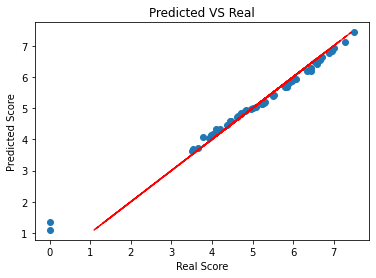

RANSAC


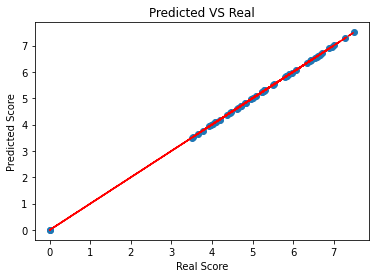

HUBER


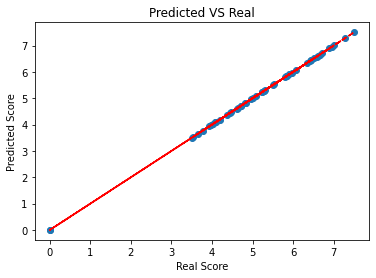

In [14]:
import matplotlib.pyplot as plt

for name, estimador in estimadores.items():
    estimador.fit(X_train, y_train)
    predictions = estimador.predict(X_test)
    print("=" * 32)
    print(name)
    plt.ylabel('Predicted Score')
    plt.xlabel('Real Score')
    plt.title('Predicted VS Real')
    plt.scatter(y_test, predictions)
    plt.plot(predictions, predictions,'r--')
    plt.show()